# IMPORTING LIBRARIES AND DATASET

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

datat = pd.read_csv("train.csv")
datat

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
print(datat.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


Check for missing values

In [3]:
print(datat.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


# DATA CLEANING

Replace missing age values with the median age

In [4]:
datat['Age'].fillna(datat['Age'].median(),inplace = True)

In [5]:
mode_embarked = datat['Embarked'].mode()[0]
datat['Embarked'].fillna(mode_embarked,inplace = True)

Drop Cabin column as it has a lot of missing values

In [6]:
datat.drop('Cabin',axis = 1,inplace = True)

EDA

Distribution of survival

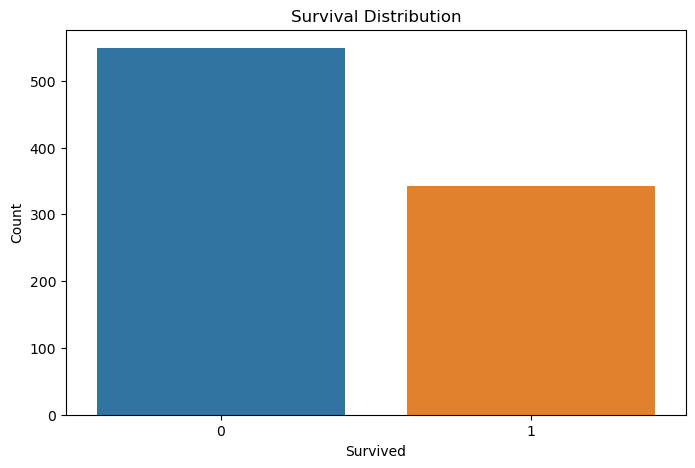

In [7]:
plt.figure(figsize = (8, 5)) 
sns.countplot(x = 'Survived',data = datat)
plt.title('Survival Distribution')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

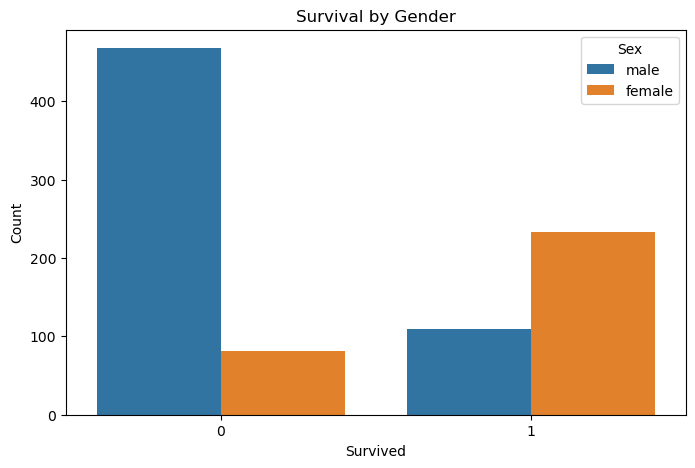

In [8]:
plt.figure(figsize=(8, 5))
sns.countplot(x = 'Survived',hue = 'Sex',data = datat)
plt.title('Survival by Gender')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.legend(title = 'Sex',loc = 'upper right')
plt.show()

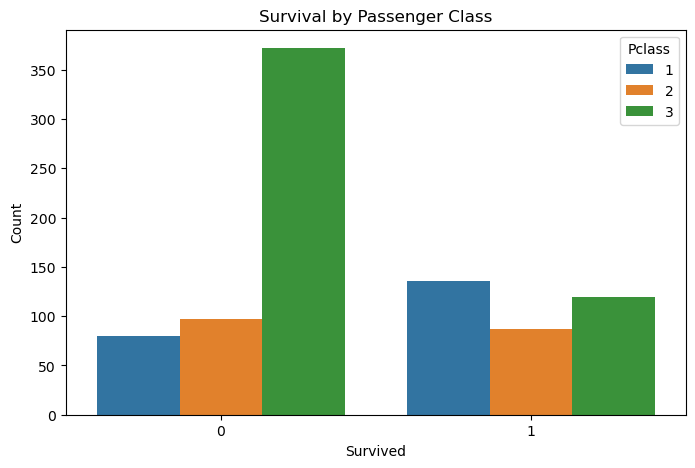

In [9]:
plt.figure(figsize=(8, 5))
sns.countplot(x = 'Survived',hue = 'Pclass',data = datat)
plt.title('Survival by Passenger Class')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.legend(title = 'Pclass',loc = 'upper right')
plt.show()

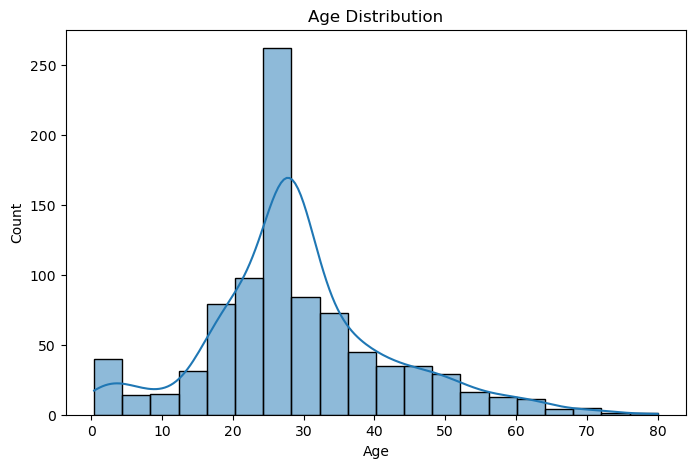

In [10]:
plt.figure(figsize = (8, 5))
sns.histplot(datat['Age'], bins = 20,kde = True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Define a function to plot correlation heatmap

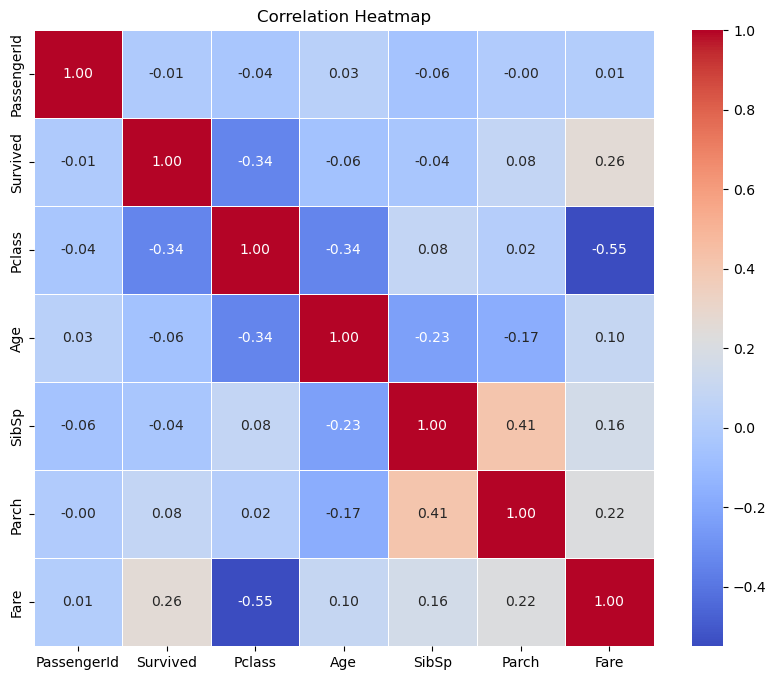

In [11]:
def plot_correlation_heatmap(dataframe): 
    try:
        # Select only numeric columns
        numeric_data = dataframe.select_dtypes(include = ['float64','int64'])
        
        plt.figure(figsize = (10, 8))
        sns.heatmap(numeric_data.corr(),annot = True,cmap = 'coolwarm',fmt = ".2f",linewidths = 0.5)
        plt.title('Correlation Heatmap')
        plt.show()
    except Exception as e:
        print("Error occurred:", e)

plot_correlation_heatmap(datat)  # Call the function with your DataFrame

Fare distribution

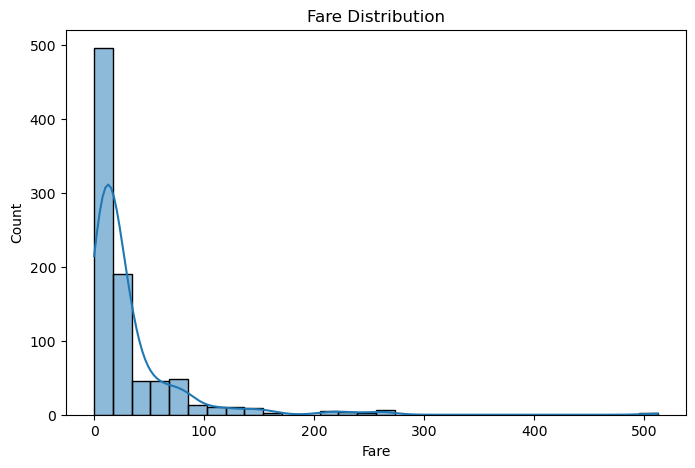

In [12]:
plt.figure(figsize = (8, 5))
sns.histplot(datat['Fare'], bins = 30, kde = True)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

Define the correlation heatmap plotting function

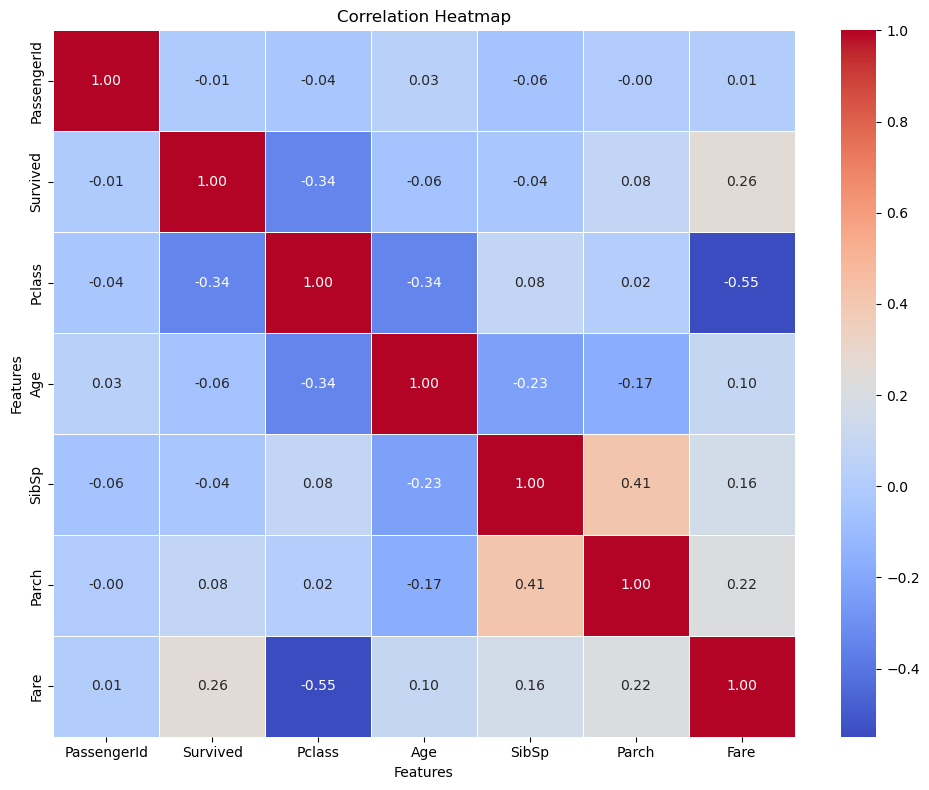

In [13]:
def plot_correlation_heatmap(dataframe):
    try:
        numeric_data = dataframe.select_dtypes(include = ['float64','int64'])
        plt.figure(figsize = (10, 8))
        sns.heatmap(numeric_data.corr(),annot = True,cmap = 'coolwarm',fmt = ".2f",linewidths = 0.5)
        plt.title('Correlation Heatmap')
        plt.xlabel('Features')
        plt.ylabel('Features')
        plt.tight_layout()  # Adjust layout to prevent clipping of labels
        plt.show()
    except Exception as e:
        print("Error occurred:", e)

# Call the function with your DataFrame
plot_correlation_heatmap(datat)
